In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [53]:
df = pd.read_csv("D:/Abhishek/angel intership/BTC_USD_2014-11-04_2022-02-05-CoinDesk.csv")

In [54]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2014-11-04,324.467934,323.826186,333.539527,323.106623
1,BTC,2014-11-05,328.644408,324.424164,330.671610,320.902900
2,BTC,2014-11-06,337.921358,328.653046,342.384170,328.597125
3,BTC,2014-11-07,348.992860,337.921358,352.585895,336.236830
4,BTC,2014-11-08,341.459753,348.992860,351.651854,340.196145


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2651 non-null   object 
 1   Date                 2651 non-null   object 
 2   Closing Price (USD)  2651 non-null   float64
 3   24h Open (USD)       2651 non-null   float64
 4   24h High (USD)       2651 non-null   float64
 5   24h Low (USD)        2651 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.4+ KB


In [56]:
df.shape

(2651, 6)

In [57]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2651.000000,2651.000000,2651.000000,2651.000000
mean,11326.047227,11310.832106,11636.480498,10938.731592
std,16058.945900,16050.090274,16501.509178,15518.268039
min,178.016008,178.016008,211.673245,169.146791
25%,628.799573,628.254706,639.473710,618.036899
50%,6343.770757,6342.913694,6451.477818,6210.054472
75%,10433.728274,10418.196255,10780.599155,10139.027590
max,67553.948930,67554.840000,68990.900000,66316.000000


In [58]:
df['Date'].min(), df['Date'].max()

('2014-11-04', '2022-02-05')

In [59]:
#We remove the columns that we do not need as well as check missing values

In [60]:
df.drop(columns = ["24h Open (USD)","24h High (USD)","24h Low (USD)","Currency"], inplace= True)

In [61]:
df.head()

,Date,Closing Price (USD)
0,2014-11-04,324.467934
1,2014-11-05,328.644408
2,2014-11-06,337.921358
3,2014-11-07,348.992860
4,2014-11-08,341.459753


In [62]:
df.isnull().sum()

Date                   0
Closing Price (USD)    0
dtype: int64

In [63]:
# Indexing with date

In [64]:
df = df.groupby('Date')['Closing Price (USD)'].sum().reset_index()

In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07',
               '2014-11-08', '2014-11-09', '2014-11-10', '2014-11-11',
               '2014-11-12', '2014-11-13',
               ...
               '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-05'],
              dtype='datetime64[ns]', name='Date', length=2651, freq=None)

In [66]:
df.head()

,Closing Price (USD)
Date,
2014-11-04,324.467934
2014-11-05,328.644408
2014-11-06,337.921358
2014-11-07,348.992860
2014-11-08,341.459753


In [67]:
#Time Series Analysis

In [68]:
#1. Visualizing Data
#2. Sampling
#3. Checking Stationarity
#4. Decomposing

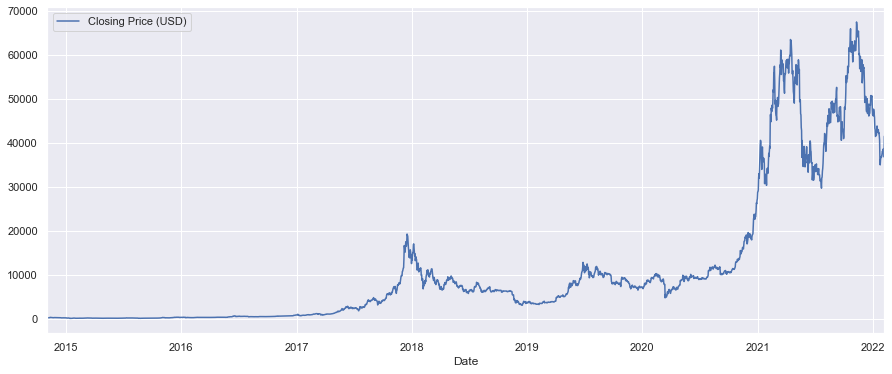

In [69]:
#1. Visualizing Data
df.plot(figsize=(15, 6))
plt.show()

In [19]:
#2. Sampling

In [72]:
y = df['Closing Price (USD)'].resample('D').mean()

In [73]:
y.head(-50)

Date
2014-11-04      324.467934
2014-11-05      328.644408
2014-11-06      337.921358
2014-11-07      348.992860
2014-11-08      341.459753
                  ...     
2021-12-13    50103.541821
2021-12-14    46732.738495
2021-12-15    48386.307184
2021-12-16    48881.300000
2021-12-17    47641.297379
Freq: D, Name: Closing Price (USD), Length: 2601, dtype: float64

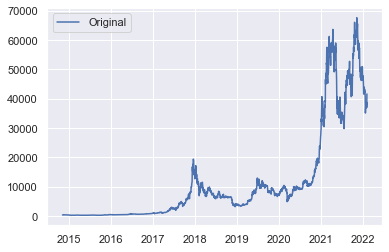

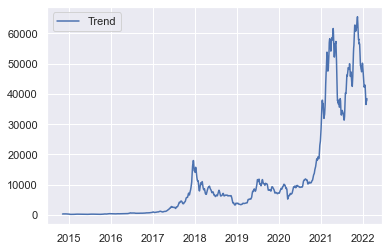

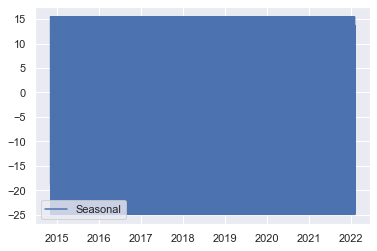

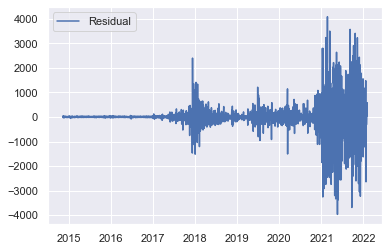

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [75]:
#Checking Stationarity
# Augmented Dickey-Fuller(ADF) statistics to check whether your time series is stationary or non-stationary

#Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

#Alternate Hypothesis: The series has no unit root (stationary)


In [76]:
from statsmodels.tsa.stattools import adfuller

In [77]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.073137
p-value: 0.725665
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [78]:
#The p-value is 0.996817, which is way above the threshold (0.05). Hence the null-hypothesis is accepted, meaning it is nonstationary.

In [79]:
# Changing it to stationary data

In [80]:
df["diff_1"] = df["Closing Price (USD)"].diff(periods=1)
df.head()

,Closing Price (USD),diff_1
Date,,
2014-11-04,324.467934,NaN
2014-11-05,328.644408,4.176474
2014-11-06,337.921358,9.276950
2014-11-07,348.992860,11.071502
2014-11-08,341.459753,-7.533107


In [81]:
result = adfuller(df["diff_1"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.531346
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [82]:
# as the p value is 0 so its the stationary data

In [83]:
df.dropna()

,Closing Price (USD),diff_1
Date,,
2014-11-05,328.644408,4.176474
2014-11-06,337.921358,9.276950
2014-11-07,348.992860,11.071502
2014-11-08,341.459753,-7.533107
2014-11-09,344.745289,3.285536
...,...,...
2022-02-01,38499.876388,571.300900
2022-02-02,38722.518519,222.642131
2022-02-03,36923.500000,-1799.018519


In [84]:
# Sampling again

In [90]:
y = df['diff_1'].resample('D').mean()
y.dropna(inplace= True)

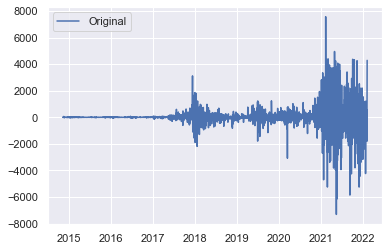

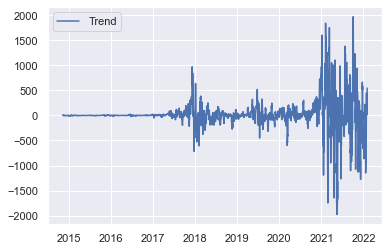

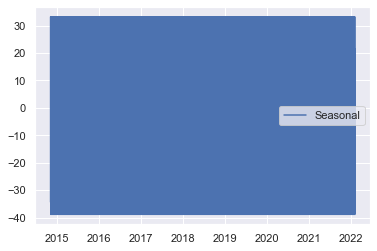

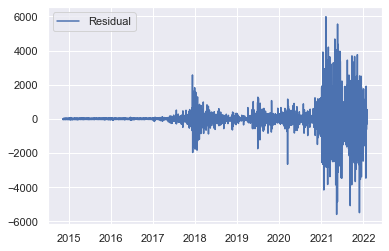

In [91]:
#Decomposing the time series into three distinct components: trend, seasonality, and noise.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

#By visualizing the decomposed components of the original time series we can say that the price of stock is unstable, along with its obvious seasonality.

In [92]:
#Time Series Forcasting using ARIMA
#We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data 

In [93]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [94]:
#Parameter Selection
#We use “grid search” to find the optimal set of parameters that yields the best performance for our model

In [95]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:42818.771495217225
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:42628.06418549737
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:44617.65108005615
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:42500.638595031305
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:42641.95860293198
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:42618.399563476094
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:43461.004343398716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:42580.35668834379
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:42801.98601488321
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:42611.669481179444
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:44593.72609954042
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:42484.01506764304
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:42640.97566438287
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:42602.92675716484
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:43459.53917211885
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:42472.891460315885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:44719.82546322234
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:44511.128845125284
ARI

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:42489.52386176477
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:42627.811449438545
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:42604.9359963325
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:43397.56423533971
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:42474.88140149566
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:43906.47779383234
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:43700.52320089802
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:45760.872827843865
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:43576.068637401855
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:43699.06550952048
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:43690.06656972663
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:44556.450857550386
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:43551.801172866646
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:42844.134439452246
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:42604.37076530127
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:44635.7889329952
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:42482.003659079055
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:42618.39294388731
ARIMA

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:42471.038088956004


#We are selecting those parameter which has minimum AIC score

In [96]:
#Fitting the ARIMA model

In [97]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0318      0.010     -3.346      0.001      -0.050      -0.013
ma.L1         -1.0000      0.051    -19.633      0.000      -1.100      -0.900
ar.S.L12      -0.0713      0.008     -8.647      0.000      -0.087      -0.055
ma.S.L12      -0.9904      0.004   -247.552      0.000      -0.998      -0.983
sigma2      6.131e+05   3.14e+04     19.508      0.000    5.52e+05    6.75e+05




Running model diagnostiscs to check any unusual behaviour
1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.


2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.


3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.


4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).


C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


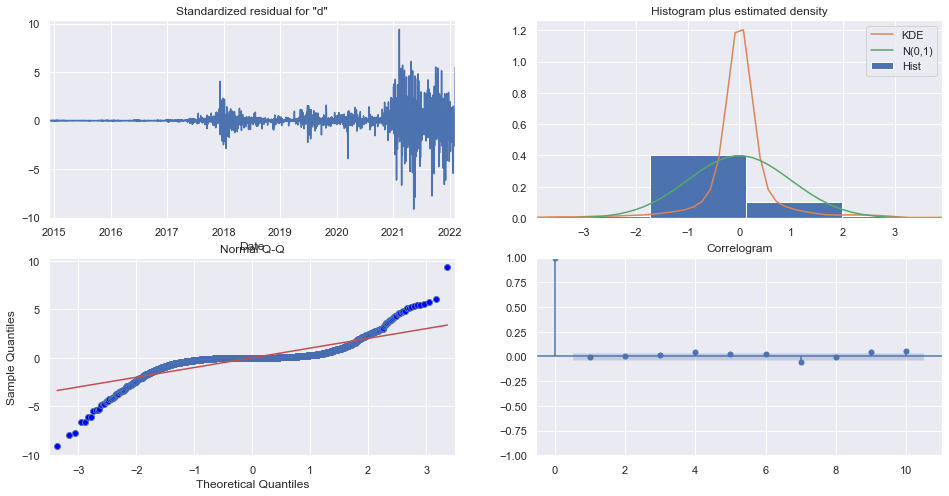

In [98]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [99]:
#The model diagnostics indicates that the model residuals are near normally distributed

In [100]:
#Validating Forecasts
#We compare predicted closing price of the time series to understand the accuracy of our forecasts

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


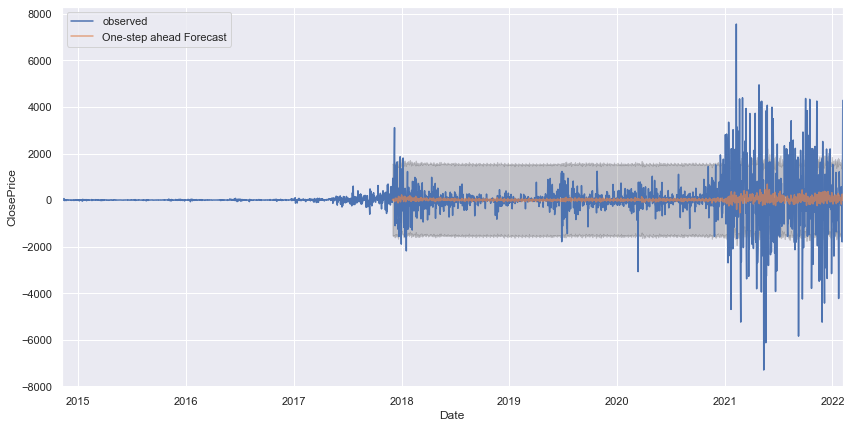

In [101]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('ClosePrice')
plt.legend()
plt.show()

#The predicated values align well with the true values.

In [102]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1053762.69
The Root Mean Squared Error of our forecasts is 1026.53


In [103]:
#MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated
#RMSE tells us that our model was able to forecast the average closing price in the test set within 1026 of the real closing price.

            lower diff_1  upper diff_1
2022-02-06  -1578.787575   1492.316853
2022-02-07  -1577.810139   1494.759001
2022-02-08  -1512.028621   1560.546214
2022-02-09  -1448.897123   1623.675120
2022-02-10  -1502.044318   1570.526167
2022-02-11  -1527.690241   1544.880340
2022-02-12  -1670.563568   1402.007058
2022-02-13  -1408.904299   1663.666394
2022-02-14  -1590.767426   1481.803353
2022-02-15  -1467.809361   1604.761522


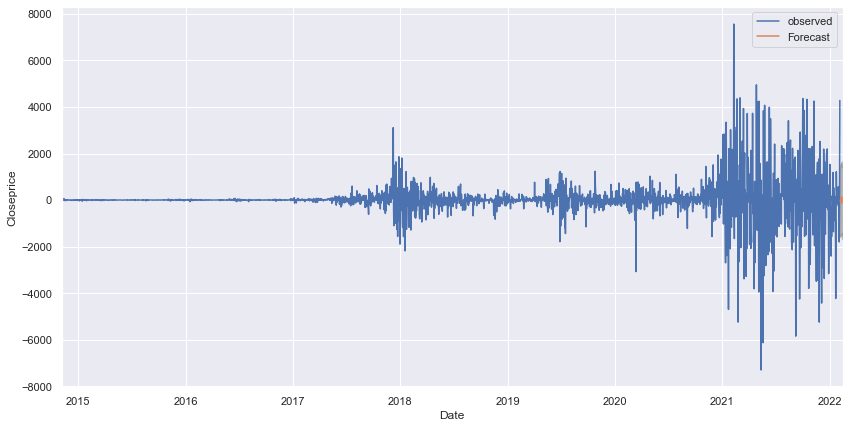

In [106]:
#Visualizing the Forecast
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Closeprice')
print(pred_ci)
plt.legend()
plt.show()